In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

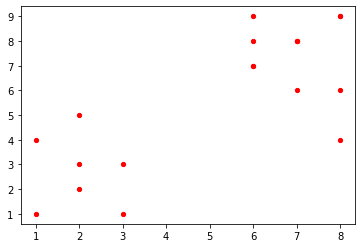

In [2]:
df = pd.read_csv("kmeans.csv")
plt.scatter(df['x'],df['y'], c='r', s=18)

[[2. 6.]
 [2. 4.]
 [7. 2.]]


Text(0, 0.5, 'y')

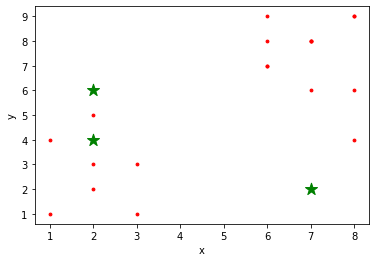

In [3]:
#---let k assume a value---
k = 3
#---create a matrix containing all points---
X = np.array(list(zip(df['x'],df['y'])))
#---generate k random points (centroids)---
Cx = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size = k)
Cy = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size = k)
#---represent the k centroids as a matrix---
C = np.array(list(zip(Cx, Cy)), dtype=np.float64)
print(C)
#---plot the orginal points as well as the k centroids---
plt.scatter(df['x'], df['y'], c='r', s=8)
plt.scatter(Cx, Cy, marker='*', c='g', s=160)
plt.xlabel("x")
plt.ylabel("y")

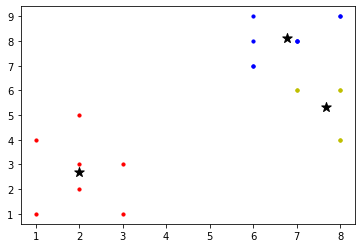

In [4]:
from copy import deepcopy
#---to calculate the distance between two points---
def euclidean_distance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)
#---create a matrix of 0 with same dimension as C (centroids)---
C_prev = np.zeros(C.shape)
#---to store the cluster each point belongs to---
clusters = np.zeros(len(X))
#---C is the random centroids and C_prev is all 0s---
#---measure the distance between the centroids and C_prev---
distance_differences = euclidean_distance(C, C_prev)
#---loop as long as there is still a difference in
# distance between the previous and current centroids---
while distance_differences.any() != 0:
 #---assign each value to its closest cluster---
    for i in range(len(X)):
        distances = euclidean_distance(X[i], C)
         #---returns the indices of the minimum values along an axis---
        cluster = np.argmin(distances)
        clusters[i] = cluster
    #---store the prev centroids---
    C_prev = deepcopy(C)
 #---find the new centroids by taking the average value---
    for i in range(k): #---k is the number of clusters---
 #---take all the points in cluster i---
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        if len(points) != 0:
            C[i] = np.mean(points, axis=0)
 #---find the distances between the old centroids and the new centroids---
    distance_differences = euclidean_distance(C, C_prev)
#---plot the scatter plot---
colors = ['b','r','y','g','c','m']
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    if len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    else:
 # this means that one of the clusters has no points
        print("Plesae regenerate your centroids again.")
plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
plt.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')

In [5]:
for i, cluster in enumerate(clusters):
    print("Point " + str(X[i]),"Cluster " + str(int(cluster)))

Point [1 1] Cluster 1
Point [2 2] Cluster 1
Point [2 3] Cluster 1
Point [1 4] Cluster 1
Point [3 3] Cluster 1
Point [6 7] Cluster 0
Point [7 8] Cluster 0
Point [6 8] Cluster 0
Point [7 6] Cluster 2
Point [6 9] Cluster 0
Point [2 5] Cluster 1
Point [7 8] Cluster 0
Point [8 9] Cluster 0
Point [6 7] Cluster 0
Point [7 8] Cluster 0
Point [3 1] Cluster 1
Point [8 4] Cluster 2
Point [8 6] Cluster 2
Point [8 9] Cluster 0


In [6]:
C

array([[6.77777778, 8.11111111],
       [2.        , 2.71428571],
       [7.66666667, 5.33333333]])

Using K-Means in Scikit-learn

In [7]:
#---using sci-kit-learn---
from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k)

In [8]:
kmeans = kmeans.fit(X)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
labels = kmeans.predict(X)

In [10]:
centroids = kmeans.cluster_centers_

In [11]:
print(labels)
print(centroids)

[1 1 1 1 1 2 2 2 0 2 1 2 2 2 2 1 0 0 2]
[[7.66666667 5.33333333]
 [2.         2.71428571]
 [6.77777778 8.11111111]]


r
b


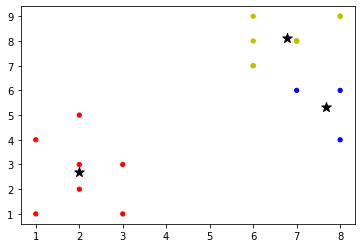

In [12]:
#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['x'],df['y'], c=colors, s=18)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')
#---making predictions---
cluster = kmeans.predict([[3,4]])[0]
print(c[cluster]) # r
cluster = kmeans.predict([[7,5]])[0]
print(c[cluster]) # y

Evaluating Cluster Size Using the Silhouette Coefficient

Silhouette Coefficient:
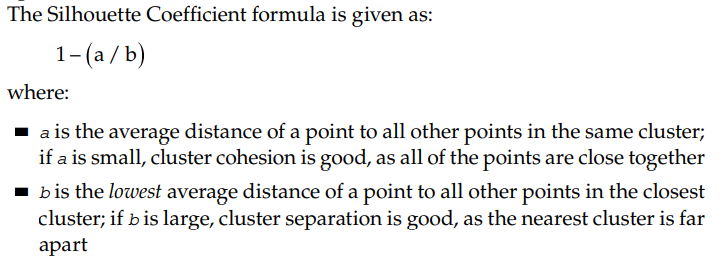

In [13]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(X, kmeans.labels_)
print(silhouette_samples)
print("Average of Silhouette Coefficients for k =", k)
print("============================================")
print("Silhouette mean:", silhouette_samples.mean())

[0.67534567 0.73722797 0.73455072 0.66254937 0.6323039  0.33332111
 0.63792468 0.58821402 0.29141777 0.59137721 0.50802377 0.63792468
 0.52511161 0.33332111 0.63792468 0.60168807 0.51664787 0.42831295
 0.52511161]
Average of Silhouette Coefficients for k = 3
Silhouette mean: 0.5578051985195768


In [14]:
print("Silhouette mean:", metrics.silhouette_score(X, kmeans.labels_))

Silhouette mean: 0.5578051985195768


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 2 is 0.6897112069939448


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 3 is 0.5578051985195768


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 4 is 0.4430381814640289


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 5 is 0.37405317678446726


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 6 is 0.41576163256548826


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 7 is 0.34647804732897297


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 8 is 0.43678049756166826


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 9 is 0.523700069276202


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 10 is 0.4597797618948823


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 11 is 0.4695564671186216


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 12 is 0.4409831398126504


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 13 is 0.4255677072435213


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 14 is 0.383836485200708


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 15 is 0.3684210526315789


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hi\AppData\Local\Temp/ipykernel_14260/597465598.py:5: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 16 is 0.3684210526315789


C:\Users\Hi\AppData\Local\Temp/ipykernel_14260/597465598.py:5: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 17 is 0.3684210526315789


C:\Users\Hi\AppData\Local\Temp/ipykernel_14260/597465598.py:5: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)


Silhouette Coefficients for k = 18 is 0.3684210526315789
Optimal K is  2


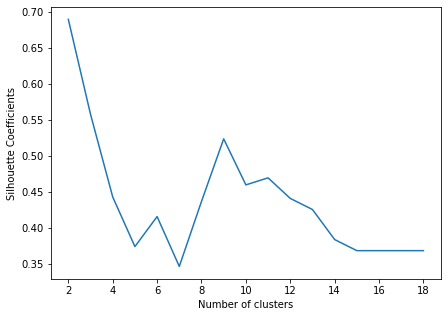

In [15]:
silhouette_avgs = []
min_k = 2
#---try k from 2 to maximum number of labels---
for k in range(min_k, len(X)):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, len(X)), silhouette_avgs)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")
#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is ", Optimal_K)

Using K-Means to Solve Real-Life Problems

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv("BMX_G.csv")

In [18]:
df.shape

(9338, 27)

In [28]:
df

,Unnamed: 0,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,...,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxsad1,bmxsad2,bmxsad3,bmxsad4,bmdavsad,bmdsadcm
0,1,62161,1,69.2,NaN,NaN,NaN,NaN,NaN,172.3,...,32.5,NaN,81.0,NaN,17.7,17.9,NaN,NaN,17.8,NaN
2,3,62163,1,49.4,NaN,NaN,NaN,NaN,NaN,168.9,...,22.0,NaN,64.6,NaN,15.6,15.5,NaN,NaN,15.6,NaN
3,4,62164,1,67.2,NaN,NaN,NaN,NaN,NaN,170.1,...,29.3,NaN,80.1,NaN,18.3,18.5,NaN,NaN,18.4,NaN
4,5,62165,1,69.1,NaN,NaN,NaN,NaN,NaN,159.4,...,29.7,NaN,86.7,NaN,21.0,20.8,NaN,NaN,20.9,NaN
5,6,62166,1,28.8,NaN,NaN,NaN,NaN,NaN,133.4,...,19.1,NaN,59.8,NaN,13.5,13.5,NaN,NaN,13.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9333,9334,71912,1,87.8,NaN,NaN,NaN,NaN,NaN,177.3,...,33.1,NaN,104.4,NaN,24.4,24.5,NaN,NaN,24.5,NaN
9334,9335,71913,1,56.5,NaN,NaN,NaN,NaN,NaN,161.6,...,27.5,NaN,79.0,NaN,17.5,17.7,NaN,NaN,17.6,NaN
9335,9336,71914,1,32.3,NaN,NaN,NaN,NaN,NaN,148.1,...,20.1,NaN,59.6,NaN,12.5,12.9,NaN,NaN,12.7,4.0
9336,9337,71915,1,78.4,NaN,NaN,NaN,NaN,NaN,168.8,...,33.4,NaN,106.6,NaN,23.1,22.9,NaN,NaN,23.0,NaN


In [19]:
df.isnull().sum()

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

In [20]:
df = df.dropna(subset=['bmxleg','bmxwaist']) # remove rows with NaNs

In [21]:
df.shape

(6899, 27)

Text(0, 0.5, 'Waist Circumference (cm)')

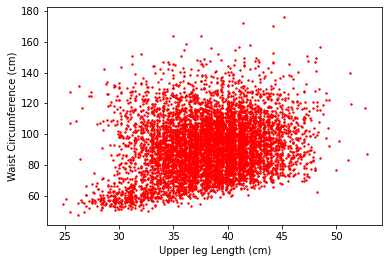

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df['bmxleg'],df['bmxwaist'], c='r', s=2)
plt.xlabel("Upper leg Length (cm)")
plt.ylabel("Waist Circumference (cm)")

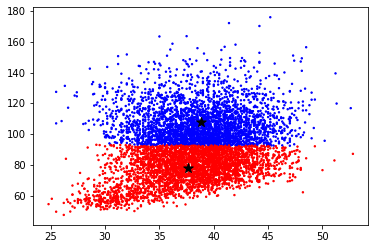

In [23]:
#---using sci-kit-learn---
from sklearn.cluster import KMeans
k = 2
X = np.array(list(zip(df['bmxleg'],df['bmxwaist'])))
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['bmxleg'],df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')

In [24]:
centroids

array([[ 38.81673886, 107.85909653],
       [ 37.65424052,  77.78993728]])

In [25]:
from sklearn import metrics
silhouette_avgs = []
min_k = 2
#---try k from 2 to maximum number of labels---
for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)
#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K)

Silhouette Coefficients for k = 2 is 0.5165351076055341
Silhouette Coefficients for k = 3 is 0.4720346615651251
Silhouette Coefficients for k = 4 is 0.4361002838544806
Silhouette Coefficients for k = 5 is 0.4191077928856913
Silhouette Coefficients for k = 6 is 0.39340893357703444
Silhouette Coefficients for k = 7 is 0.37712176668692304
Silhouette Coefficients for k = 8 is 0.3610930970171874
Silhouette Coefficients for k = 9 is 0.34099236902946034
Optimal K is 2


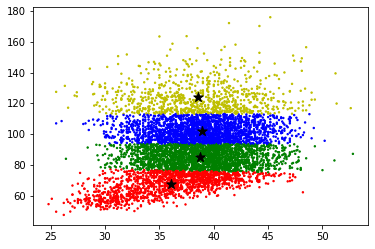

In [26]:
#---using sci-kit-learn---
from sklearn.cluster import KMeans
k = 4
X = np.array(list(zip(df['bmxleg'],df['bmxwaist'])))
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['bmxleg'],df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')

In [27]:
centroids

array([[ 38.88743243, 102.24495495],
       [ 36.06354309,  67.37961696],
       [ 38.58878822, 124.10305776],
       [ 38.73389032,  85.16730934]])

In [30]:
labels

array([3, 1, 3, ..., 1, 0, 1])

In [34]:
labels[1:20]

array([1, 3, 3, 1, 1, 1, 1, 2, 2, 3, 3, 0, 0, 0, 1, 3, 1, 3, 1])